In [203]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm
import math
import numpy as np

In [204]:
features = pd.read_csv("F:/HAR/DSADS/features2.csv", index_col = 0)

In [205]:
features 

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,jumping
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,jumping
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,jumping
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,jumping


In [206]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
features[LABEL] = le.fit_transform(features['activity'].values.ravel())

In [207]:
features.drop(['activity'], axis=1, inplace=True)

In [208]:
features['ActivityEncoded'].value_counts()

0     480
4     480
8     480
1     480
5     480
9     480
2     480
6     480
10    480
3     480
7     480
Name: ActivityEncoded, dtype: int64

In [209]:
features

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,ActivityEncoded
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,6
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,6
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,6
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,6
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,2
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,2
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,2
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,2


In [210]:
"""
sitting                    6
standing                   7
lyingBack                  3
lyingRigh                  4

ascendingStairs            0
decendingStairs            1
walkingLot                 8
walkingTreadmillFlat       9
walkingTreadmillIncline    10

runningTreadmill           5
jumping                    2
"""

'\nsitting                    6\nstanding                   7\nlyingBack                  3\nlyingRigh                  4\n\nascendingStairs            0\ndecendingStairs            1\nwalkingLot                 8\nwalkingTreadmillFlat       9\nwalkingTreadmillIncline    10\n\nrunningTreadmill           5\njumping                    2\n'

In [211]:
features['ActivityEncoded'].value_counts()

0     480
4     480
8     480
1     480
5     480
9     480
2     480
6     480
10    480
3     480
7     480
Name: ActivityEncoded, dtype: int64

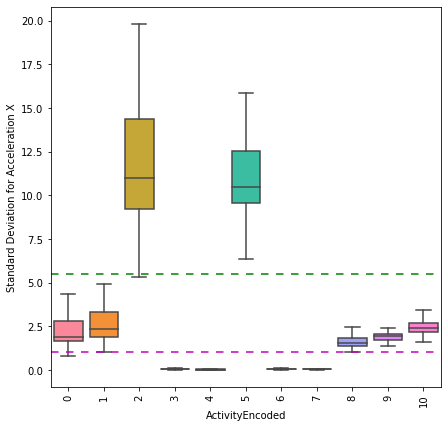

In [212]:
# TEST CODE 1
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityEncoded', y='T_xacc_std',data=features, showfliers=False, saturation=1)
plt.ylabel('Standard Deviation for Acceleration X')

plt.axhline(y=5.5,dashes=(5,5), c='g')
plt.axhline(y=1, dashes=(5,5), c='m')

plt.xticks(rotation=90)
plt.show()

In [213]:
features['ActivityEncoded'].value_counts()

0     480
4     480
8     480
1     480
5     480
9     480
2     480
6     480
10    480
3     480
7     480
Name: ActivityEncoded, dtype: int64

In [214]:

import time
start_time = time.time()

print("Trainig Start")

condition = np.where(features['T_xacc_std'] > 0.4)
features2 = features.iloc[condition]

condition = np.where(features2['T_xacc_std'] < 5.5)
new_features = features2.iloc[condition]

print("End")
print("Time: {:.1f}min".format(((time.time() - start_time))/60))


Trainig Start
End
Time: 0.0min


In [215]:
new_features['ActivityEncoded'].value_counts()

0     480
8     480
10    480
1     480
9     480
3       3
2       2
4       1
6       1
Name: ActivityEncoded, dtype: int64

In [216]:
idx = new_features[new_features['ActivityEncoded'] == 3].index
new_features.drop(idx , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [217]:
idx = new_features[new_features['ActivityEncoded'] == 2].index
new_features.drop(idx , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [218]:
idx = new_features[new_features['ActivityEncoded'] == 4].index
new_features.drop(idx , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [219]:
idx = new_features[new_features['ActivityEncoded'] == 6].index
new_features.drop(idx , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [220]:
new_features['ActivityEncoded'].value_counts()

0     480
8     480
10    480
1     480
9     480
Name: ActivityEncoded, dtype: int64

In [221]:
new_features = new_features.replace({'ActivityEncoded':8},2)

In [222]:
new_features = new_features.replace({'ActivityEncoded':10},3)

In [223]:
new_features = new_features.replace({'ActivityEncoded':9},4)

In [224]:
new_features['ActivityEncoded'].value_counts()

0    480
2    480
4    480
1    480
3    480
Name: ActivityEncoded, dtype: int64

In [225]:
new_features = pd.concat([new_features, new_features], axis = 0)

In [226]:
new_features['ActivityEncoded'].value_counts()

0    960
4    960
1    960
2    960
3    960
Name: ActivityEncoded, dtype: int64

In [227]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend

import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical

In [228]:

f_col_all = ['T_xacc_mean', 'T_xacc_max', 'T_xacc_min','T_xacc_var',
       'T_xacc_std', 'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min',
       'T_yacc_var', 'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max',
       'T_zacc_min', 'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean',
       'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std',
       'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min',
       'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean',
       'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std',
       'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var',
       'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min',
       'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max',
       'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew']
       

X = new_features[f_col_all]  # all features

X_OneHotEncoded = pd.get_dummies(X)  # all features and OneHotEncoded
f_col_OHE = list(X_OneHotEncoded.columns.values)

y = new_features["ActivityEncoded"].apply(lambda x: 1 if x== "Yes" else 0 )  # Labels
y = new_features["ActivityEncoded"]
print(X_OneHotEncoded.head())

      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
1920     7.570732      15.061         0.0   17.169455    4.143604   
1921     7.544015      15.433         0.0   16.827956    4.102189   
1922     7.571806      16.878         0.0   18.861743    4.343011   
1923     7.463242      14.912         0.0   16.403361    4.050106   
1924     7.624589      14.823         0.0   17.000649    4.123184   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
1920    -0.864170     0.044689      1.6809     -1.7616    0.856312  ...   
1921    -0.867638     0.192589      2.0541     -1.3427    1.219419  ...   
1922    -0.513859     0.471196      2.8308     -1.9441    1.042799  ...   
1923    -0.907132     0.442211      2.2893     -1.6441    0.810045  ...   
1924    -0.935006     0.325602      2.2835     -2.8210    1.215301  ...   

      T_ymag_min  T_ymag_var  T_ymag_std  T_ymag_skew  T_zmag_mean  \
1920         0.0    0.044656    0.211320    -1.347671    -0.3444

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [230]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_OneHotEncoded, y, test_size=0.01, random_state=6)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train : (4752, 54)
y_train : (4752,)
X_test : (48, 54)
y_test : (48,)


In [231]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend
from keras.models import Sequential

In [232]:
CLASSES = 5
INPUT_SIZE = 54

In [233]:
# custom activation function
def custom_activation(output):
	logexpsum = backend.sum(backend.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result

In [234]:
def define_discriminator(n_classes=CLASSES):
  # image input
  in_image = Input(shape=(INPUT_SIZE,))   
  # downsample
  fe = Dense(units=128, activation='relu')(in_image)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Dense(units=128, activation='relu')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Dense(units=128, activation='relu')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Dense(units=128, activation='relu')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Dense(units=128, activation='relu')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Dense(units=128, activation='relu')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)    
  # dropout
  fe = Dropout(0.4)(fe)
  # output layer nodes
  fe = Dense(n_classes)(fe)
  # supervised output
  c_out_layer = Activation('softmax')(fe)

  # define and compile supervised discriminator model
  
  c_model = Model(in_image, c_out_layer)
  c_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.003, beta_1=0.5), metrics=['accuracy'])

  # unsupervised output
  d_out_layer = Lambda(custom_activation)(fe)

  # define and compile unsupervised discriminator model
  d_model = Model(in_image, d_out_layer)
  d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.003, beta_1=0.5))    
  d_model.summary()
  return d_model, c_model

In [235]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=INPUT_SIZE):
	model = Sequential()
	model.add(Dense(200, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(128, activation='relu'))    
	model.add(Dense(128, activation='relu'))     
	model.add(Dense(128, activation='relu'))       
	model.add(Dense(n_outputs, activation='relu'))
	model.summary()
	return model

In [236]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect image output from generator as input to discriminator
	gan_output = d_model(g_model.output)
	# define gan model as taking noise and outputting a classification
	model = Model(g_model.input, gan_output)
	# compile model
	opt = Adam(lr=0.003, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)

	return model

In [237]:
# load the images
def load_real_samples(X,y):    
	X = X / 20
	print(X.shape, y.shape)
	return [X, y]

In [238]:
# select a supervised subset of the dataset, ensures classes are balanced
def select_supervised_samples(dataset2, n_samples=143, n_classes=CLASSES):
  X, y = dataset2
  rand = randint(0,1000)
  #n_per_class = int(n_samples / n_classes)
  n_per_class = int(n_samples)
  return X.sample(n=n_per_class,replace=False, random_state=rand), y.sample(n=n_per_class,replace=False, random_state=rand)

In [239]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
  features, labels = dataset
	# choose random instances
  rand = randint(0, 1000)
	# select features and labels
  X = features.sample(n=n_samples,random_state=rand)
  labels = labels.sample(n=n_samples,random_state=rand)
	# generate class labels
  y = ones((n_samples, 1))
  return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	z_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = z_input.reshape(n_samples, latent_dim)
	return z_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict(z_input)
	# create class labels
	y = zeros((n_samples, 1))
	return images, y


In [240]:
# generate samples and save as a plot and save the model

def summarize_performance(step, g_model, c_model, latent_dim, dataset, acc_list, n_samples=100):
    
	# evaluate the classifier model
	X, y = dataset
	_, acc = c_model.evaluate(X, y, verbose=0)
	print('Classifier Accuracy: %.3f%%' % (acc * 100))
	acc_list.append(acc)

    
	# save the generator model
	filename2 = 'models/g_model_%04d.h5' % (step+1)
	g_model.save(filename2)
    
	# save the classifier model
	filename3 = 'models/c_model_%04d.h5' % (step+1)
	c_model.save(filename3)
	#print('>Saved:  %s and %s' % (filename2, filename3))

In [241]:
d_supervised_losses=[]
g_supervised_losses=[]
c_accuray=[]
iteration_checkpoints=[]


def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, acc_list, n_epochs=200, n_batch=100):
    
	# select supervised dataset
	X_sup, y_sup = select_supervised_samples(dataset)
	print("Select supervised dataset: ", X_sup.shape, y_sup.shape)
    
	#print("Select extended supervised dataset: ", X_sup2.shape, y_sup2.shape)
    
	# calculate the number of batches per training epoch
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
    
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
    
	# calculate the size of half a batch of samples
	half_batch = int(n_batch / 2)
	print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % (n_epochs, n_batch, half_batch, bat_per_epo, n_steps))
    
	# manually enumerate epochs
	for i in range(n_steps):
		# update supervised discriminator (c)
		[Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
		c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)
		# update unsupervised discriminator (d)
		[X_real, _], y_real = generate_real_samples(dataset, half_batch)
		d_loss1 = d_model.train_on_batch(X_real, y_real)
		X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		d_loss2 = d_model.train_on_batch(X_fake, y_fake)
		# update generator (g)
		X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
		g_loss = gan_model.train_on_batch(X_gan, y_gan)
		# summarize loss on this batch
		print('>%d, c[%.3f,%.0f%%], d[%.3f,%.3f], g[%.3f]' % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))                

        # evaluate the model performance every so often           
		if (i+1) % (100) == 0:            
			summarize_performance(i, g_model, c_model, latent_dim, dataset, acc_list)
			d_supervised_losses.append(d_loss1)
			g_supervised_losses.append(g_loss)
			c_accuray.append(c_acc)
			iteration_checkpoints.append(i+1)            

In [242]:
#accuracy list for each epochs
acc_list = []

# size of the latent space
latent_dim = 100
# create the discriminator models
d_model, c_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples(X_train,y_train)

X, y = dataset
dataset2 = dataset.copy()

print("Total dataset: ", X.shape, y.shape)

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 54)]              0         
                                                                 
 dense_78 (Dense)            (None, 128)               7040      
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_79 (Dense)            (None, 128)               16512     
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_80 (Dense)            (None, 128)               16512     
                                                                 
 leaky_re_lu_38 (LeakyReLU)  (None, 128)               0  

(4752, 54) (4752,)
Total dataset:  (4752, 54) (4752,)


In [ ]:
import time
start_time = time.time()
print("Trainig Start")

train(g_model, d_model, c_model, gan_model, dataset, latent_dim, acc_list)

#_, test_acc = c_model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.3f%%' % (test_acc * 100))

    
print("End")
print("Time: {:.1f}min".format(((time.time() - start_time))/60))

Trainig Start
Select supervised dataset:  (143, 54) (143,)
n_epochs=200, n_batch=100, 1/2=50, b/e=47, steps=9400
2/2 [==============================] - 0s 2ms/step
>1, c[1.611,18%], d[0.181,1.833], g[0.180]
2/2 [==============================] - 0s 2ms/step
>2, c[1.607,22%], d[0.178,1.807], g[0.186]
2/2 [==============================] - 0s 2ms/step
>3, c[1.607,20%], d[0.179,1.773], g[0.192]
2/2 [==============================] - 0s 2ms/step
>4, c[1.599,26%], d[0.182,1.751], g[0.198]
2/2 [==============================] - 0s 3ms/step
>5, c[1.599,22%], d[0.180,1.728], g[0.205]
2/2 [==============================] - 0s 3ms/step
>6, c[1.595,26%], d[0.179,1.709], g[0.209]
2/2 [==============================] - 0s 2ms/step
>7, c[1.597,22%], d[0.174,1.699], g[0.212]
2/2 [==============================] - 0s 2ms/step
>8, c[1.583,22%], d[0.167,1.675], g[0.220]
2/2 [==============================] - 0s 2ms/step
>9, c[1.579,22%], d[0.161,1.630], g[0.237]
2/2 [==============================] - 0s

2/2 [==============================] - 0s 2ms/step
>86, c[1.737,40%], d[0.008,0.001], g[8.695]
2/2 [==============================] - 0s 2ms/step
>87, c[1.198,54%], d[0.138,0.007], g[7.068]
2/2 [==============================] - 0s 2ms/step
>88, c[0.658,76%], d[0.296,0.018], g[4.649]
2/2 [==============================] - 0s 2ms/step
>89, c[0.793,68%], d[0.080,0.263], g[7.966]
2/2 [==============================] - 0s 2ms/step
>90, c[1.135,66%], d[0.049,0.003], g[7.252]
2/2 [==============================] - 0s 3ms/step
>91, c[0.658,78%], d[0.027,0.004], g[6.565]
2/2 [==============================] - 0s 3ms/step
>92, c[0.713,74%], d[0.057,0.005], g[6.447]
2/2 [==============================] - 0s 3ms/step
>93, c[0.581,80%], d[0.056,0.003], g[6.695]
2/2 [==============================] - 0s 2ms/step
>94, c[0.507,80%], d[0.100,0.004], g[6.029]
2/2 [==============================] - 0s 3ms/step
>95, c[0.670,76%], d[0.024,0.008], g[6.047]
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 2ms/step
>101, c[0.501,76%], d[0.266,0.008], g[4.951]
2/2 [==============================] - 0s 3ms/step
>102, c[1.004,68%], d[0.050,0.011], g[5.729]
2/2 [==============================] - 0s 2ms/step
>103, c[0.539,76%], d[0.035,0.009], g[6.260]
2/2 [==============================] - 0s 2ms/step
>104, c[0.377,90%], d[0.030,0.042], g[7.966]
2/2 [==============================] - 0s 2ms/step
>105, c[0.385,90%], d[0.042,0.003], g[7.844]
2/2 [==============================] - 0s 2ms/step
>106, c[0.578,84%], d[0.027,0.002], g[7.209]
2/2 [==============================] - 0s 2ms/step
>107, c[0.344,88%], d[0.034,0.006], g[6.943]
2/2 [==============================] - 0s 3ms/step
>108, c[0.462,82%], d[0.007,0.008], g[7.097]
2/2 [==============================] - 0s 2ms/step
>109, c[0.453,80%], d[0.007,0.036], g[6.828]
2/2 [==============================] - 0s 3ms/step
>110, c[0.438,82%], d[0.004,0.006], g[7.626]
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step
>186, c[0.224,94%], d[0.002,0.002], g[8.363]
2/2 [==============================] - 0s 2ms/step
>187, c[0.286,92%], d[0.008,0.004], g[8.825]
2/2 [==============================] - 0s 2ms/step
>188, c[0.307,92%], d[0.001,0.021], g[8.381]
2/2 [==============================] - 0s 2ms/step
>189, c[0.196,94%], d[0.001,0.001], g[9.043]
2/2 [==============================] - 0s 2ms/step
>190, c[0.225,90%], d[0.001,0.010], g[9.848]
2/2 [==============================] - 0s 3ms/step
>191, c[0.240,90%], d[0.001,0.004], g[9.462]
2/2 [==============================] - 0s 2ms/step
>192, c[0.388,88%], d[0.001,0.006], g[9.958]
2/2 [==============================] - 0s 3ms/step
>193, c[0.138,100%], d[0.002,0.001], g[10.845]
2/2 [==============================] - 0s 3ms/step
>194, c[0.295,90%], d[0.002,0.000], g[11.627]
2/2 [==============================] - 0s 3ms/step
>195, c[0.208,94%], d[0.002,0.000], g[10.920]
2/2 [==============================]

2/2 [==============================] - 0s 2ms/step
>201, c[0.173,96%], d[0.002,0.001], g[9.944]
2/2 [==============================] - 0s 2ms/step
>202, c[0.085,98%], d[0.001,0.001], g[10.775]
2/2 [==============================] - 0s 2ms/step
>203, c[0.179,96%], d[0.001,0.001], g[11.295]
2/2 [==============================] - 0s 2ms/step
>204, c[0.108,96%], d[0.001,0.001], g[11.906]
2/2 [==============================] - 0s 3ms/step
>205, c[0.155,98%], d[0.002,0.001], g[11.971]
2/2 [==============================] - 0s 2ms/step
>206, c[0.118,96%], d[0.004,0.001], g[12.028]
2/2 [==============================] - 0s 2ms/step
>207, c[0.110,98%], d[0.002,0.006], g[12.237]
2/2 [==============================] - 0s 2ms/step
>208, c[0.101,96%], d[0.002,0.003], g[11.500]
2/2 [==============================] - 0s 2ms/step
>209, c[0.188,96%], d[0.001,0.000], g[12.232]
2/2 [==============================] - 0s 3ms/step
>210, c[0.122,94%], d[0.001,0.001], g[11.387]
2/2 [==========================

2/2 [==============================] - 0s 2ms/step
>285, c[0.022,100%], d[0.000,0.000], g[12.589]
2/2 [==============================] - 0s 3ms/step
>286, c[0.028,100%], d[0.000,0.000], g[12.833]
2/2 [==============================] - 0s 2ms/step
>287, c[0.116,98%], d[0.000,0.000], g[12.246]
2/2 [==============================] - 0s 2ms/step
>288, c[0.017,100%], d[0.000,0.000], g[12.187]
2/2 [==============================] - 0s 3ms/step
>289, c[0.020,100%], d[0.000,0.000], g[12.098]
2/2 [==============================] - 0s 2ms/step
>290, c[0.053,98%], d[0.000,0.000], g[12.522]
2/2 [==============================] - 0s 3ms/step
>291, c[0.023,100%], d[0.000,0.000], g[12.881]
2/2 [==============================] - 0s 2ms/step
>292, c[0.028,100%], d[0.000,0.000], g[12.365]
2/2 [==============================] - 0s 3ms/step
>293, c[0.036,100%], d[0.001,0.000], g[12.370]
2/2 [==============================] - 0s 3ms/step
>294, c[0.023,100%], d[0.000,0.000], g[12.575]
2/2 [=================

2/2 [==============================] - 0s 2ms/step
>301, c[0.020,100%], d[0.001,0.000], g[12.865]
2/2 [==============================] - 0s 2ms/step
>302, c[0.011,100%], d[0.000,0.000], g[12.577]
2/2 [==============================] - 0s 2ms/step
>303, c[0.011,100%], d[0.000,0.002], g[12.881]
2/2 [==============================] - 0s 2ms/step
>304, c[0.024,100%], d[0.000,0.001], g[13.269]
2/2 [==============================] - 0s 1000us/step
>305, c[0.007,100%], d[0.000,0.000], g[13.169]
2/2 [==============================] - 0s 2ms/step
>306, c[0.012,100%], d[0.000,0.000], g[12.969]
2/2 [==============================] - 0s 3ms/step
>307, c[0.031,100%], d[0.000,0.000], g[13.248]
2/2 [==============================] - 0s 2ms/step
>308, c[0.020,100%], d[0.004,0.001], g[12.149]
2/2 [==============================] - 0s 2ms/step
>309, c[0.087,96%], d[0.001,0.000], g[12.838]
2/2 [==============================] - 0s 2ms/step
>310, c[0.066,98%], d[0.000,0.000], g[12.087]
2/2 [==============

2/2 [==============================] - 0s 2ms/step
>385, c[0.219,92%], d[0.000,0.007], g[13.291]
2/2 [==============================] - 0s 3ms/step
>386, c[0.155,96%], d[0.001,0.000], g[13.303]
2/2 [==============================] - 0s 2ms/step
>387, c[0.161,94%], d[0.000,0.000], g[12.160]
2/2 [==============================] - 0s 3ms/step
>388, c[0.198,96%], d[0.000,0.001], g[11.724]
2/2 [==============================] - 0s 2ms/step
>389, c[0.079,98%], d[0.001,0.000], g[13.004]
2/2 [==============================] - 0s 2ms/step
>390, c[0.063,98%], d[0.001,0.000], g[13.175]
2/2 [==============================] - 0s 3ms/step
>391, c[0.067,98%], d[0.001,0.000], g[13.619]
2/2 [==============================] - 0s 2ms/step
>392, c[0.060,98%], d[0.002,0.000], g[13.492]
2/2 [==============================] - 0s 2ms/step
>393, c[0.036,100%], d[0.000,0.000], g[13.525]
2/2 [==============================] - 0s 3ms/step
>394, c[0.042,100%], d[0.000,0.000], g[13.463]
2/2 [=======================

2/2 [==============================] - 0s 3ms/step
>401, c[0.037,100%], d[0.000,0.000], g[13.863]
2/2 [==============================] - 0s 2ms/step
>402, c[0.021,100%], d[0.000,0.000], g[14.306]
2/2 [==============================] - 0s 3ms/step
>403, c[0.046,98%], d[0.000,0.000], g[13.968]
2/2 [==============================] - 0s 2ms/step
>404, c[0.049,100%], d[0.000,0.000], g[14.159]
2/2 [==============================] - 0s 3ms/step
>405, c[0.034,100%], d[0.000,0.000], g[14.111]
2/2 [==============================] - 0s 2ms/step
>406, c[0.060,96%], d[0.001,0.000], g[14.086]
2/2 [==============================] - 0s 2ms/step
>407, c[0.054,98%], d[0.000,0.000], g[14.487]
2/2 [==============================] - 0s 2ms/step
>408, c[0.034,100%], d[0.000,0.000], g[14.615]
2/2 [==============================] - 0s 2ms/step
>409, c[0.013,100%], d[0.000,0.000], g[14.602]
2/2 [==============================] - 0s 2ms/step
>410, c[0.058,98%], d[0.000,0.000], g[14.107]
2/2 [===================

>484, c[0.002,100%], d[0.000,0.000], g[15.083]
2/2 [==============================] - 0s 4ms/step
>485, c[0.015,100%], d[0.000,0.000], g[14.895]
2/2 [==============================] - 0s 2ms/step
>486, c[0.006,100%], d[0.000,0.000], g[14.987]
2/2 [==============================] - 0s 2ms/step
>487, c[0.014,100%], d[0.000,0.000], g[15.035]
2/2 [==============================] - 0s 2ms/step
>488, c[0.003,100%], d[0.000,0.000], g[14.884]
2/2 [==============================] - 0s 3ms/step
>489, c[0.013,100%], d[0.000,0.000], g[14.821]
2/2 [==============================] - 0s 2ms/step
>490, c[0.033,98%], d[0.000,0.000], g[15.027]
2/2 [==============================] - 0s 2ms/step
>491, c[0.006,100%], d[0.000,0.000], g[15.035]
2/2 [==============================] - 0s 2ms/step
>492, c[0.008,100%], d[0.000,0.000], g[14.980]
2/2 [==============================] - 0s 2ms/step
>493, c[0.007,100%], d[0.000,0.000], g[15.082]
2/2 [==============================] - 0s 2ms/step
>494, c[0.004,100%], 

2/2 [==============================] - 0s 2ms/step
>501, c[0.001,100%], d[0.000,0.000], g[15.142]
2/2 [==============================] - 0s 3ms/step
>502, c[0.006,100%], d[0.000,0.000], g[14.927]
2/2 [==============================] - 0s 2ms/step
>503, c[0.002,100%], d[0.000,0.000], g[14.812]
2/2 [==============================] - 0s 3ms/step
>504, c[0.004,100%], d[0.000,0.000], g[14.810]
2/2 [==============================] - 0s 2ms/step
>505, c[0.002,100%], d[0.000,0.000], g[15.187]
2/2 [==============================] - 0s 3ms/step
>506, c[0.006,100%], d[0.000,0.000], g[14.896]
2/2 [==============================] - 0s 2ms/step
>507, c[0.008,100%], d[0.000,0.000], g[14.980]
2/2 [==============================] - 0s 2ms/step
>508, c[0.004,100%], d[0.001,0.000], g[15.117]
2/2 [==============================] - 0s 2ms/step
>509, c[0.034,98%], d[0.000,0.000], g[14.985]
2/2 [==============================] - 0s 3ms/step
>510, c[0.019,100%], d[0.000,0.000], g[15.031]
2/2 [================

2/2 [==============================] - 0s 2ms/step
>585, c[0.002,100%], d[0.000,0.000], g[14.904]
2/2 [==============================] - 0s 2ms/step
>586, c[0.001,100%], d[0.000,0.000], g[15.045]
2/2 [==============================] - 0s 3ms/step
>587, c[0.002,100%], d[0.000,0.000], g[14.850]
2/2 [==============================] - 0s 2ms/step
>588, c[0.002,100%], d[0.000,0.000], g[15.110]
2/2 [==============================] - 0s 3ms/step
>589, c[0.001,100%], d[0.000,0.000], g[15.275]
2/2 [==============================] - 0s 2ms/step
>590, c[0.007,100%], d[0.000,0.000], g[15.169]
2/2 [==============================] - 0s 2ms/step
>591, c[0.004,100%], d[0.000,0.000], g[14.861]
2/2 [==============================] - 0s 2ms/step
>592, c[0.002,100%], d[0.000,0.000], g[14.992]
2/2 [==============================] - 0s 2ms/step
>593, c[0.025,98%], d[0.000,0.000], g[14.990]
2/2 [==============================] - 0s 3ms/step
>594, c[0.005,100%], d[0.000,0.000], g[15.117]
2/2 [================

2/2 [==============================] - 0s 2ms/step
>601, c[0.007,100%], d[0.000,0.000], g[15.192]
2/2 [==============================] - 0s 2ms/step
>602, c[0.003,100%], d[0.000,0.000], g[15.048]
2/2 [==============================] - 0s 1ms/step
>603, c[0.001,100%], d[0.000,0.000], g[14.876]
2/2 [==============================] - 0s 2ms/step
>604, c[0.001,100%], d[0.000,0.000], g[15.056]
2/2 [==============================] - 0s 3ms/step
>605, c[0.003,100%], d[0.000,0.000], g[15.227]
2/2 [==============================] - 0s 2ms/step
>606, c[0.003,100%], d[0.000,0.000], g[15.131]
2/2 [==============================] - 0s 3ms/step
>607, c[0.003,100%], d[0.000,0.000], g[15.047]
2/2 [==============================] - 0s 3ms/step
>608, c[0.001,100%], d[0.000,0.000], g[14.814]
2/2 [==============================] - 0s 2ms/step
>609, c[0.001,100%], d[0.000,0.000], g[14.979]
2/2 [==============================] - 0s 2ms/step
>610, c[0.001,100%], d[0.000,0.000], g[14.984]
2/2 [===============

>684, c[0.008,100%], d[0.000,0.000], g[14.125]
2/2 [==============================] - 0s 3ms/step
>685, c[0.008,100%], d[0.000,0.000], g[14.942]
2/2 [==============================] - 0s 2ms/step
>686, c[0.013,100%], d[0.000,0.000], g[14.621]
2/2 [==============================] - 0s 2ms/step
>687, c[0.012,100%], d[0.000,0.000], g[14.475]
2/2 [==============================] - 0s 3ms/step
>688, c[0.016,100%], d[0.000,0.000], g[14.218]
2/2 [==============================] - 0s 2ms/step
>689, c[0.005,100%], d[0.000,0.000], g[14.271]
2/2 [==============================] - 0s 2ms/step
>690, c[0.008,100%], d[0.000,0.000], g[14.536]
2/2 [==============================] - 0s 2ms/step
>691, c[0.007,100%], d[0.000,0.000], g[14.465]
2/2 [==============================] - 0s 2ms/step
>692, c[0.006,100%], d[0.000,0.000], g[14.116]
2/2 [==============================] - 0s 2ms/step
>693, c[0.013,100%], d[0.000,0.000], g[14.766]
2/2 [==============================] - 0s 2ms/step
>694, c[0.005,100%],

2/2 [==============================] - 0s 2ms/step
>701, c[0.013,100%], d[0.003,0.000], g[14.590]
2/2 [==============================] - 0s 3ms/step
>702, c[0.008,100%], d[0.000,0.000], g[14.399]
2/2 [==============================] - 0s 2ms/step
>703, c[0.021,100%], d[0.000,0.008], g[14.562]
2/2 [==============================] - 0s 3ms/step
>704, c[0.012,100%], d[0.000,0.000], g[14.552]
2/2 [==============================] - 0s 3ms/step
>705, c[0.006,100%], d[0.000,0.000], g[14.872]
2/2 [==============================] - 0s 2ms/step
>706, c[0.009,100%], d[0.000,0.000], g[15.003]
2/2 [==============================] - 0s 3ms/step
>707, c[0.005,100%], d[0.000,0.000], g[14.499]
2/2 [==============================] - 0s 2ms/step
>708, c[0.005,100%], d[0.000,0.000], g[14.710]
2/2 [==============================] - 0s 3ms/step
>709, c[0.004,100%], d[0.003,0.000], g[14.489]
2/2 [==============================] - 0s 4ms/step
>710, c[0.003,100%], d[0.000,0.000], g[14.619]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>785, c[0.005,100%], d[0.000,0.000], g[14.666]
2/2 [==============================] - 0s 2ms/step
>786, c[0.012,100%], d[0.000,0.000], g[15.143]
2/2 [==============================] - 0s 2ms/step
>787, c[0.001,100%], d[0.000,0.000], g[14.860]
2/2 [==============================] - 0s 3ms/step
>788, c[0.002,100%], d[0.000,0.000], g[14.658]
2/2 [==============================] - 0s 2ms/step
>789, c[0.003,100%], d[0.000,0.000], g[15.050]
2/2 [==============================] - 0s 3ms/step
>790, c[0.002,100%], d[0.000,0.000], g[14.832]
2/2 [==============================] - 0s 3ms/step
>791, c[0.008,100%], d[0.000,0.000], g[14.679]
2/2 [==============================] - 0s 2ms/step
>792, c[0.004,100%], d[0.000,0.000], g[14.384]
2/2 [==============================] - 0s 2ms/step
>793, c[0.004,100%], d[0.000,0.001], g[14.889]
2/2 [==============================] - 0s 2ms/step
>794, c[0.003,100%], d[0.000,0.000], g[14.903]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>801, c[0.001,100%], d[0.000,0.000], g[14.819]
2/2 [==============================] - 0s 2ms/step
>802, c[0.003,100%], d[0.000,0.000], g[14.893]
2/2 [==============================] - 0s 2ms/step
>803, c[0.002,100%], d[0.000,0.000], g[14.998]
2/2 [==============================] - 0s 2ms/step
>804, c[0.001,100%], d[0.000,0.007], g[15.141]
2/2 [==============================] - 0s 1000us/step
>805, c[0.003,100%], d[0.000,0.000], g[15.012]
2/2 [==============================] - 0s 2ms/step
>806, c[0.006,100%], d[0.000,0.000], g[15.229]
2/2 [==============================] - 0s 3ms/step
>807, c[0.002,100%], d[0.000,0.000], g[14.870]
2/2 [==============================] - 0s 3ms/step
>808, c[0.006,100%], d[0.000,0.000], g[15.099]
2/2 [==============================] - 0s 3ms/step
>809, c[0.002,100%], d[0.000,0.000], g[14.843]
2/2 [==============================] - 0s 2ms/step
>810, c[0.001,100%], d[0.000,0.000], g[15.085]
2/2 [============

2/2 [==============================] - 0s 3ms/step
>885, c[0.000,100%], d[0.000,0.000], g[15.056]
2/2 [==============================] - 0s 2ms/step
>886, c[0.001,100%], d[0.000,0.000], g[14.980]
2/2 [==============================] - 0s 2ms/step
>887, c[0.002,100%], d[0.000,0.000], g[15.081]
2/2 [==============================] - 0s 2ms/step
>888, c[0.001,100%], d[0.000,0.000], g[15.149]
2/2 [==============================] - 0s 3ms/step
>889, c[0.001,100%], d[0.000,0.000], g[15.068]
2/2 [==============================] - 0s 3ms/step
>890, c[0.001,100%], d[0.000,0.000], g[15.135]
2/2 [==============================] - 0s 2ms/step
>891, c[0.001,100%], d[0.000,0.000], g[15.117]
2/2 [==============================] - 0s 2ms/step
>892, c[0.000,100%], d[0.000,0.000], g[15.161]
2/2 [==============================] - 0s 2ms/step
>893, c[0.004,100%], d[0.000,0.000], g[15.154]
2/2 [==============================] - 0s 2ms/step
>894, c[0.002,100%], d[0.000,0.000], g[15.018]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>901, c[0.001,100%], d[0.000,0.000], g[15.070]
2/2 [==============================] - 0s 2ms/step
>902, c[0.002,100%], d[0.000,0.000], g[15.123]
2/2 [==============================] - 0s 2ms/step
>903, c[0.001,100%], d[0.000,0.000], g[15.256]
2/2 [==============================] - 0s 2ms/step
>904, c[0.002,100%], d[0.000,0.000], g[15.203]
2/2 [==============================] - 0s 2ms/step
>905, c[0.001,100%], d[0.000,0.000], g[15.189]
2/2 [==============================] - 0s 3ms/step
>906, c[0.002,100%], d[0.000,0.000], g[15.086]
2/2 [==============================] - 0s 2ms/step
>907, c[0.000,100%], d[0.000,0.000], g[15.150]
2/2 [==============================] - 0s 3ms/step
>908, c[0.000,100%], d[0.000,0.000], g[15.280]
2/2 [==============================] - 0s 2ms/step
>909, c[0.001,100%], d[0.000,0.000], g[15.336]
2/2 [==============================] - 0s 3ms/step
>910, c[0.001,100%], d[0.000,0.000], g[15.303]
2/2 [===============